# CSCE 623 Homework Assignment 4

### Student Name:  <font color="red">TODD, MICHAEL</font>

### Date: May 09, 2023

### Baseball Salary Regression in multi-feature player dataset

Instructions:
* Review all provided code before starting your work - this instructor has provided hints and tips throughout the code
* This assignment is composed of 2 parts
    * Load, split, and explore the data
    * Fit models and evaluate performance
* Complete the numbered STEPS which contain (STUDENT CODE REQUIRED) and (STUDENT MARKDOWN RESPONSE REQUIRED) activities
* Remember to restart the kernel and rerun all cells before submitting the assignment
* Submit only the Jupyter Notebook (.ipynb) file - do not submit the datasets.

In [1]:
# Note... not all of these are used...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import copy

from math import factorial

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate,  cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer


from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

from sklearn.feature_selection import SequentialFeatureSelector

%matplotlib inline
plt.style.use('seaborn-white')

import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

## OPTIONAL STUDENT CODING: If you need any imports, code them below

In [152]:
######### ------- EXTRA STUDENT IMPORTS ------------
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
from sklearn.ensemble import IsolationForest

######### ------- END STUDENT IMPORTS ------------

# Part A:  Data setup and exploration

This dataset contains information about various baseball players and their salaries.  

### Load the 'ISLR_Hitters.csv' data using pandas (INSTRUCTOR CODE PROVIDED).  
* set the `index_col` to 0
* There are unknown salaries in the dataset for some players... drop any `na`s in the dataset (there will be 263 remaining rows after removing the nas)
* Ensure the index is correctly identifying each of the 263 rows from the index 0 to 262 without gaps
* Store the full dataset data in `df`
* Make the name column of the player be `Player`


In [3]:
# df = pd.read_csv('ISLR_Hitters.csv', index_col=False).dropna()
pre_df = pd.read_csv('ISLR_Hitters.csv').dropna().reset_index(drop=True)
pre_df.rename(columns={ pre_df.columns[0]: "Player" },inplace=True)
display(pre_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     263 non-null    object 
 1   AtBat      263 non-null    int64  
 2   Hits       263 non-null    int64  
 3   HmRun      263 non-null    int64  
 4   Runs       263 non-null    int64  
 5   RBI        263 non-null    int64  
 6   Walks      263 non-null    int64  
 7   Years      263 non-null    int64  
 8   CAtBat     263 non-null    int64  
 9   CHits      263 non-null    int64  
 10  CHmRun     263 non-null    int64  
 11  CRuns      263 non-null    int64  
 12  CRBI       263 non-null    int64  
 13  CWalks     263 non-null    int64  
 14  League     263 non-null    object 
 15  Division   263 non-null    object 
 16  PutOuts    263 non-null    int64  
 17  Assists    263 non-null    int64  
 18  Errors     263 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

None

##  STEP 1: (STUDENT CODE REQUIRED) Preprocess the categorical columns in the data using one-hot-encoding 

Notice that `League`, `Division` and `NewLeague` are non-numerical categories (stored as `object`s ) which should be converted to one-hot-encoded features.  Each of these categorical features only contains two categories, and if we created 2 one-hot features for each, using both columns would not provide any more information than using one.  Since we want to eliminate columns which provide redundant information, we only need one of the category columns to be 'hot' and if it is not (0 instead of 1), we know that the other category for that feature must be true.   

For example, we create a one-hot-encoded column `League_N` such that if the original categorical value in `League` was `N` then the one-hot-encoded column `League_N` should contain a 1, however if the categorical value in `League` was `A` then the one-hot-encoded column `League_N` should contain a 0

Create a new dataframe `df` to accomplish this for each of the three categorical features.  After completing this step, the dataset `df` should be such that
* The categorical column `League` (`A`merican or `N`ational) is represented instead with column  `League_N` which contains a 1 if `League` was `N` or a 0 if `League` was `A`
* The categorical column  `Division` (`E`ast or `W`est) is represented instead with column `Division_W` which contains a 1 if `Division` was `W` or a 0 if `Division` was `E`
* The categorical column   `NewLeague` (`A`merican or `N`ational) is represented instead with column `NewLeague_N` which contains a 1 if `NewLeague` was `N` or a 0 if `NewLeague` was `A` 
* `df` doesn't contain the original 3 categorical variables (`League`, `Division` and `NewLeague`)

Check to make sure everytyhing worked correctly.  After this step is complete there should still be 263 rows, 21 columns, and all columns except for `Player` will contain numeric information (no letters, strings, objects)


Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and the function's option `drop= 'first'` 

In [4]:
# STEP 1

df = None #placeholder

#----------------START STUDENT CODE -----------------------

drop_enc = OneHotEncoder(drop='first').fit(pre_df[['League']])

pre_df['League_N']=drop_enc.transform(pre_df[['League']]).toarray()

drop_enc = OneHotEncoder(drop='first').fit(pre_df[['Division']])
                                               
pre_df['Division_W']=drop_enc.transform(pre_df[['Division']]).toarray()

drop_enc = OneHotEncoder(drop='first').fit(pre_df[['NewLeague']])
                                               
pre_df['NewLeague_N']=drop_enc.transform(pre_df[['NewLeague']]).toarray()

df = pre_df.drop(['League', 'Division', 'NewLeague'], axis=1)

print(df)

#----------------END STUDENT CODE -----------------------

               Player  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0          Alan Ashby    315    81      7    24   38     39     14    3449   
1         Alvin Davis    479   130     18    66   72     76      3    1624   
2        Andre Dawson    496   141     20    65   78     37     11    5628   
3    Andres Galarraga    321    87     10    39   42     30      2     396   
4     Alfredo Griffin    594   169      4    74   51     35     11    4408   
..                ...    ...   ...    ...   ...  ...    ...    ...     ...   
258      Willie McGee    497   127      7    65   48     37      5    2703   
259   Willie Randolph    492   136      5    76   50     94     12    5511   
260    Wayne Tolleson    475   126      3    61   43     52      6    1700   
261     Willie Upshaw    573   144      9    85   60     78      8    3198   
262     Willie Wilson    631   170      9    77   44     31     11    4908   

     CHits  ...  CRuns  CRBI  CWalks  PutOuts  Assists  Errors 

In [5]:
df.info()  #confirm existence of dummies and auto-generated names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       263 non-null    object 
 1   AtBat        263 non-null    int64  
 2   Hits         263 non-null    int64  
 3   HmRun        263 non-null    int64  
 4   Runs         263 non-null    int64  
 5   RBI          263 non-null    int64  
 6   Walks        263 non-null    int64  
 7   Years        263 non-null    int64  
 8   CAtBat       263 non-null    int64  
 9   CHits        263 non-null    int64  
 10  CHmRun       263 non-null    int64  
 11  CRuns        263 non-null    int64  
 12  CRBI         263 non-null    int64  
 13  CWalks       263 non-null    int64  
 14  PutOuts      263 non-null    int64  
 15  Assists      263 non-null    int64  
 16  Errors       263 non-null    int64  
 17  Salary       263 non-null    float64
 18  League_N     263 non-null    float64
 19  Division

### Separating features and regression target labels & test/non-test split (INSTRUCTOR CODE PROVIDED)

Next we will 
* Separate features and labels in the full dataset into X and y.
* Partition the data into test and non-test sets

In [6]:
y = df.Salary
# Drop the column with the independent variable (Salary)
# X = df.drop(['Salary'], axis=1).astype('float64')
X = df.drop(['Salary'], axis=1)

testfraction = 0.25
randState = 42

X_nonTest, X_test, y_nonTest, y_test = train_test_split(X, y, test_size=testfraction, random_state=randState)

In [7]:
# display the names of the features
list(X_nonTest.columns)

['Player',
 'AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'League_N',
 'Division_W',
 'NewLeague_N']

In [8]:
y_nonTest.info()

<class 'pandas.core.series.Series'>
Int64Index: 197 entries, 143 to 102
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


### Explore the value of the response variable (salary)   (INSTRUCTOR CODE PROVIDED)

<class 'pandas.core.series.Series'>
Int64Index: 197 entries, 143 to 102
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
197 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


None

count     197.000000
mean      543.483442
std       445.996188
min        67.500000
25%       195.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

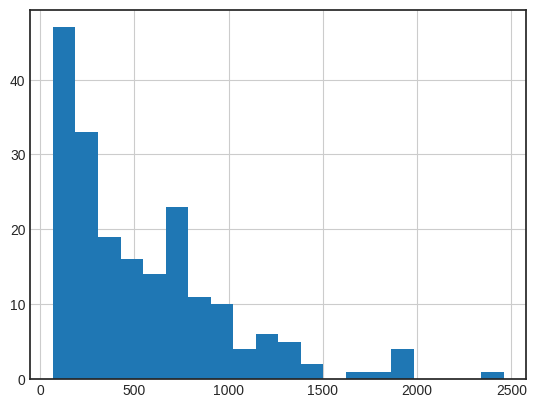

In [9]:
display(y_nonTest.info())
display(y_nonTest.describe())

y_nonTest.hist(bins=20)
plt.show()

Notice that the histogram of the response variable reveals very few observations containing higher salaries (above $1.0M).  This may cause problems when trying to predict in this range

## STEP 2: Create a new response variable by taking the log of the actual dollar salary value. (STUDENT CODE REQURIED)

* Store the value of the base-10-log of the actual dollar sallary $($ `y_nonTest` $\times1000)$ in a variable called `log_y_nonTest` using `numpy`'s  `log10` function.
* show a histogram of `log_y_nonTest`

Note that we will need to do this later for the test set y too


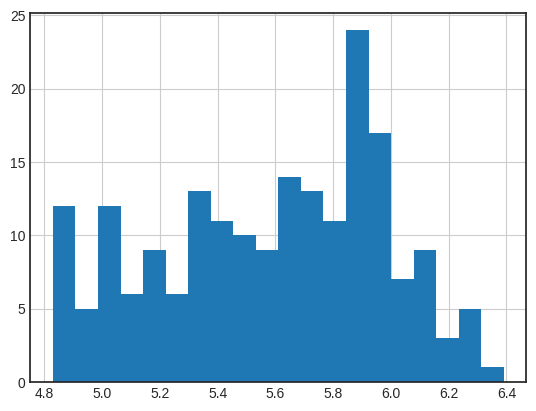

In [122]:
# STEP 2

log_y_nonTest = None #placeholder

#----------------START STUDENT CODE -----------------------

#remember to use the function from numpy... not base python

# Apply log base 10 to the lables
log_y_nonTest = np.log10(y_nonTest * 1000)

# Plot histogram for transformed label
log_y_nonTest.hist(bins=20)
plt.show()

#----------------END STUDENT CODE -----------------------


## STEP 3: Explore the non-test data features & select relevant features (STUDENT CODE REQUIRED)

1.  Using only the `X_nonTest` and `log_y_nonTest` data, conduct data exploration on the features
2.  Using log salary labels, compute correlations with each possible feature
3.  Select the top 7 features you think might work well for predicting player (log) salary.  Later you will be required to provide evidence supporting your beliefs 
2.  Store the column names of your selected features as a list in `best_features`.  

Suggestions:  Use `.corr` will be helpful here

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 143 to 102
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        197 non-null    object 
 1   AtBat         197 non-null    int64  
 2   Hits          197 non-null    int64  
 3   HmRun         197 non-null    int64  
 4   Runs          197 non-null    int64  
 5   RBI           197 non-null    int64  
 6   Walks         197 non-null    int64  
 7   Years         197 non-null    int64  
 8   CAtBat        197 non-null    int64  
 9   CHits         197 non-null    int64  
 10  CHmRun        197 non-null    int64  
 11  CRuns         197 non-null    int64  
 12  CRBI          197 non-null    int64  
 13  CWalks        197 non-null    int64  
 14  PutOuts       197 non-null    int64  
 15  Assists       197 non-null    int64  
 16  Errors        197 non-null    int64  
 17  League_N      197 non-null    float64
 18  Division_W    197 non-null  

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N,Log10_Salary
Log10_Salary,0.460821,0.498856,0.353717,0.449779,0.456524,0.424962,0.552032,0.616541,0.620958,0.513435,0.621864,0.603516,0.557547,0.245375,0.106332,0.007536,0.044307,-0.136038,0.037359,1.000000
CRuns,0.247012,0.242866,0.253633,0.225266,0.287310,0.290583,0.883509,0.984265,0.984792,0.818339,1.000000,0.946132,0.929754,0.081398,-0.003661,-0.076895,-0.002545,-0.024019,0.018260,0.621864
CHits,0.234866,0.241127,0.206039,0.178496,0.273461,0.228583,0.902618,0.995572,1.000000,0.774690,0.984792,0.943774,0.889525,0.089392,0.032098,-0.033834,0.036782,0.000767,0.056731,0.620958
CAtBat,0.225137,0.221420,0.208366,0.167376,0.267534,0.233764,0.917806,1.000000,0.995572,0.797734,0.984265,0.952060,0.904365,0.072006,0.040982,-0.032393,0.036087,0.003381,0.049920,0.616541
CRBI,0.233179,0.227340,0.352527,0.203629,0.375412,0.291949,0.873345,0.952060,0.943774,0.926462,0.946132,1.000000,0.901114,0.121798,-0.048729,-0.075820,0.008370,-0.006664,0.020124,0.603516
CWalks,0.154702,0.142566,0.240312,0.169767,0.236220,0.402333,0.833594,0.904365,0.889525,0.829914,0.929754,0.901114,1.000000,0.080835,-0.026129,-0.110958,0.023975,-0.046370,0.017072,0.557547
Years,0.034840,0.042820,0.109341,-0.009184,0.137345,0.098868,1.000000,0.917806,0.902618,0.728505,0.883509,0.873345,0.833594,-0.016603,-0.028729,-0.115941,0.026974,0.009540,0.022491,0.552032
CHmRun,0.213107,0.183801,0.498244,0.227728,0.422409,0.335967,0.728505,0.797734,0.774690,1.000000,0.818339,0.926462,0.829914,0.111934,-0.153301,-0.134762,-0.070822,-0.005730,-0.059801,0.513435
Hits,0.964016,1.000000,0.522130,0.897012,0.773487,0.592798,0.042820,0.221420,0.241127,0.183801,0.242866,0.227340,0.142566,0.345215,0.318104,0.259166,-0.127386,-0.075514,-0.060075,0.498856
AtBat,1.000000,0.964016,0.540472,0.892997,0.781535,0.631274,0.034840,0.225137,0.234866,0.213107,0.247012,0.233179,0.154702,0.338049,0.353121,0.306924,-0.124050,-0.053292,-0.052380,0.460821


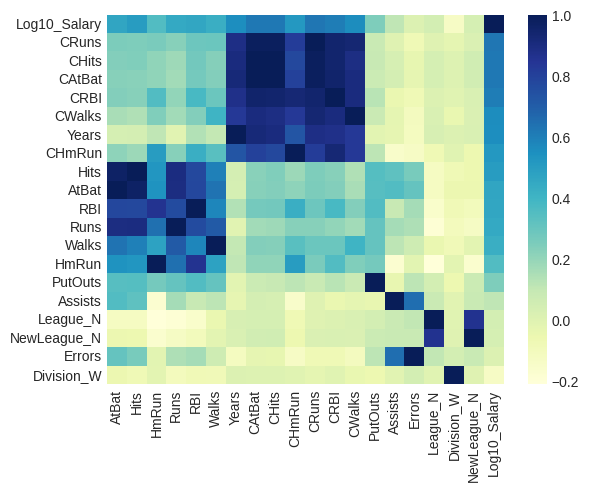

In [99]:
# STEP 3

best_features = []  #placeholder

# when exploring relationship between features and predictors, it might be useful to have a (re)combined set\n",

xy_nontest = pd.concat([X_nonTest, log_y_nonTest], axis=1)
xy_nontest.rename(columns={"Salary":"Log10_Salary"},inplace=True)
xy_nontest.info()

#----------------START STUDENT CODE -----------------------

# Decription of each feature
print("Description:\n", xy_nontest.describe())

# Correlation for each 
corr_xy_nontest = xy_nontest.corr().sort_values('Log10_Salary', ascending=False)

display(corr_xy_nontest)

dataplot = sns.heatmap(corr_xy_nontest, cmap="YlGnBu")
  
# displaying heatmap
plt.show()

# selection of best features:
best_features = ['AtBat', 'Hits', 'Runs', 'RBI', 'Walks', 'HmRun', 'PutOuts']
#best_features = ['CRuns', 'CHits', 'CAtBat', 'CRBI', 'CWalks', 'Years', 'CHmRun']
                           
#----------------END STUDENT CODE -----------------------

In [100]:
#instructor code 
print("STUDENT-SELECTED BEST FEATURES:", best_features)

STUDENT-SELECTED BEST FEATURES: ['AtBat', 'Hits', 'Runs', 'RBI', 'Walks', 'HmRun', 'PutOuts']


## STEP 4: Evidence supporting selection of best Features  (STUDENT MARKDOWN REQUIRED)

Provide descriptions of the evidence you used to make your decisions about best features


--------------------------

<font color='green'>STUDENT ANSWER HERE STEP 4</font>


<font color='green'> The seven features I first selected were all related to career level statistics. This made sense to me as this statistic tracks the overall success of a given player.  Using the correlation matrix focusing on log of salaries, the largest maginitude of correlation coefficients are between Log Salaries and CRuns (0.621864), CHits (0.620958), CAtBat (0.616541), CRBI (0.603516), CWalks (0.557547), Years (0.552032), and CHmRun (0.513435). These values measure the strengh and direction (postive or negative) of a linear relationship between two variables. But just because they are corrolaoted does not mean they are the best features to get the best prediction. Using a heatmap, it helped me see that all of the career stats are highly coorolated with each other. Therefore, if we are only selecting 7 features, selecting all of the career statistics may not give us the best results.  This is dispalyed in the heatmap where all career statistics are dark blue when compaired with all other career statistics. Using the heatmap again, I selected the next 7 non-career features, that is AtBat, Hits, Runs, RBI, Walks, HmRun, and PutOuts. But I am not sure which is the best combination of features as it might include some of the features from the career statistics as well. </font>

<font color='green'>END STUDENT ANSWER</font>    
    
------------------------


###  Make a `seaborn` `pairplot` of the these 7 features that you think are most useful AND the log salary. (INSTRUCTOR-PROVIDED CODE)

(note that pairplots make take time to render - the more features you include the longer they take)  


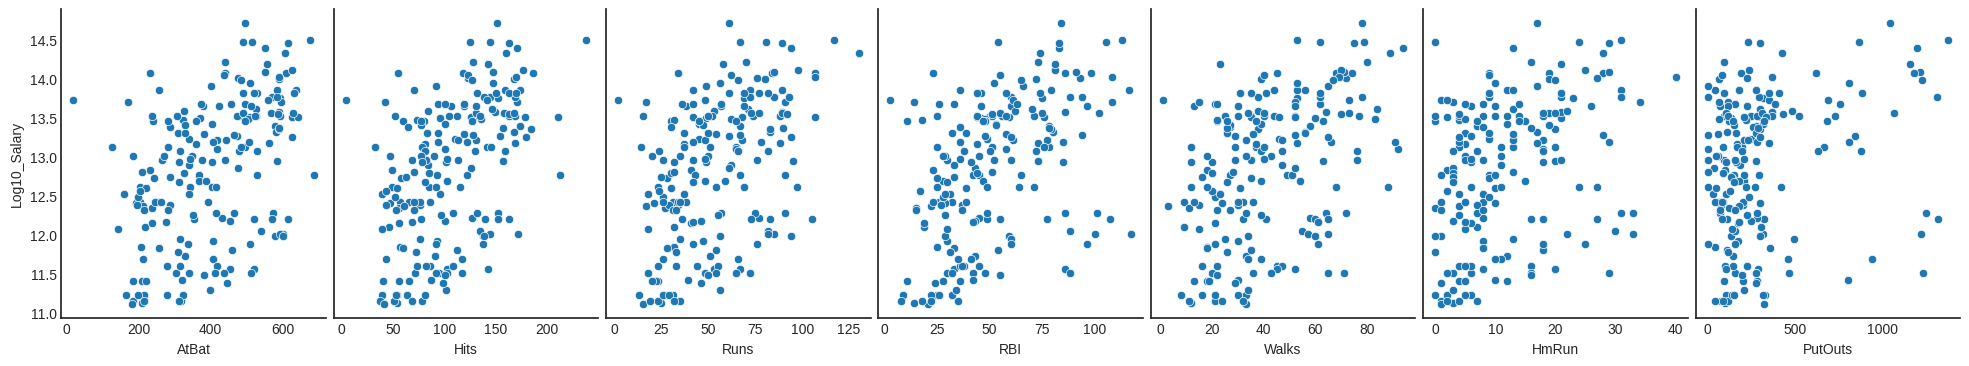

In [102]:
# NOTE - THIS MAKE TAKE A FEW MOMENTS TO CALCULATE & DISPLAY ON YOUR COMPUTER

#switch the below to True to show the pairsplot.
if True:
    g = sns.pairplot(data=xy_nontest, x_vars=best_features,y_vars="Log10_Salary")
    # g = sns.pairplot(data=xy_nontest, x_vars=best_features,y_vars="Salary", height=1, aspect=1.0)
    g.fig.set_size_inches(20,4)
    


## STEP 5:  Scale all X data using nonTest data scaler  (STUDENT CODE REQUIRED)
* Scale the data features since we dont want some features to affect the linear regressions differently just becasue they have different scales
* Fit the `zscaler` to the non-test data and transform the non-test data into the variable called `X_nonTest_scaled`.  Remember that we should not be using test data for this!
* then *apply* those (non-test) fitted parameters to the test data into the variable called `X_test_scaled` to preserve the scaling *without being influenced by any aspect of the test data*
* Remember to not attempt to scale non-numerical features (like `Player`) or one-hot features liek `League_N`, `Division_W` and `NewLeague_N`

Hint: when using `sklearn`'s `StandardScalar`, `.fit`, `.fit_transform`, and `.transform` will be useful here

See:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

In [103]:
# STEP 5

X_nonTest_scaled = None #placeholder

cols = list(X_nonTest.columns.values)
exclude_scale_cols = ['Player','League_N','Division_W','NewLeague_N']
cols_to_scale = cols.copy()
for r in exclude_scale_cols: 
    cols_to_scale.remove(r)

zscaler = StandardScaler()  #use this object to conduct the scaling in the student code block

X_nonTest_scaled = None  #placeholder
X_test_scaled = None  #placeholder


#----------------START STUDENT CODE -----------------------

nonTest_tmp = X_nonTest.copy()

# features to scale in dataframe format
nonTest_feats = nonTest_tmp[cols_to_scale]

# Fit to the test nonTest df
zscaler.fit(nonTest_feats.values)

# Scale the features in the df
nonTest_feats = zscaler.transform(nonTest_feats.values)

# Put scaled values back into data structure
nonTest_tmp[cols_to_scale] = nonTest_feats

# Load the results into X_nonTest_scaled df
X_nonTest_scaled = nonTest_tmp

###############################################################################
# Now transform the test data as well with the same fit from the test data.
test_tmp = X_test.copy()

# features to scale in dataframe format
test_feats = test_tmp[cols_to_scale]

# Scale the features in the df
test_feats = zscaler.transform(test_feats.values)

# Put scaled values back into data structure
test_tmp[cols_to_scale] = test_feats

# Load the results into X_test_scaled df
X_test_scaled = test_tmp

#----------------END STUDENT CODE -----------------------

The following instructor eval code will report the means and standard deviations of both the nonTest data features and the testData features

HINT:  What would you expect to see as the difference in the means and stdevs between these two partitions of the data if the previous step was completed properly?

In [104]:
# Instructor eval code
print("-Before transformation, non-test column names:\n", cols)

print("---After transformation, non-test column names:\n", list(X_nonTest_scaled.columns.values))
print("---After transformation, test column names:\n", list(X_test_scaled.columns.values))


scalingdf = pd.DataFrame({'actualNonTestMeans':zscaler.mean_ ,
                          'actualNonTestStds':zscaler.scale_,
                          'scaledMeansNonTest':X_nonTest_scaled[cols_to_scale].mean(axis=0),
                          'scaledStdsNonTest':X_nonTest_scaled[cols_to_scale].std(axis=0),
                          'scaledMeansTest':X_test_scaled[cols_to_scale].mean(axis=0),
                          'scaledStdsTest':X_test_scaled[cols_to_scale].std(axis=0)})
display(scalingdf)

-Before transformation, non-test column names:
 ['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
---After transformation, non-test column names:
 ['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']
---After transformation, test column names:
 ['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N']


,actualNonTestMeans,actualNonTestStds,scaledMeansNonTest,scaledStdsNonTest,scaledMeansTest,scaledStdsTest
AtBat,402.461929,142.475984,1.290564e-16,1.002548,0.033021,1.130117
Hits,106.776650,43.094759,1.603342e-16,1.002548,0.097298,1.175414
HmRun,11.786802,8.860179,1.127130e-18,1.002548,-0.075121,0.949986
Runs,54.030457,24.704530,-3.099607e-17,1.002548,0.115296,1.125640
RBI,51.685279,25.270163,-2.254260e-18,1.002548,-0.031315,1.094091
Walks,41.563452,20.905207,-1.831586e-16,1.002548,-0.085659,1.146284
Years,7.223350,4.728235,-5.072085e-17,1.002548,0.074533,1.052625
CAtBat,2634.228426,2312.704358,-3.155964e-17,1.002548,0.040173,0.953013
CHits,718.258883,660.201576,0.000000e+00,1.002548,0.023705,0.924312
CHmRun,70.730964,84.771557,-3.212320e-17,1.002548,-0.070107,0.869022


### Make a prediction evaluator that accounts for the log base 10 scaled salaries (INSTRUCTOR-PROVIDED CODE)

Before we start fitting models there is one last thing we need to do.

Although the new Y values after log-10 scaling should help our model fit, it means the models predictions will be of log-10 salary (not the salary value itself).  In order to compensate for this we will build a new helper function to compute MSE on predictions which were made in the logspace.  This MSE method will be used by our model while computing the optimization equiation in search for good models.

A transform to calculate the $MSE$ in the original dataspace is shown below - and all $MSE$ values will be calculated in salary space instead of log-10 salary space.

In [105]:
def transform_rmse(y_true, y_pred):
    ydiff = np.power(10,y_true) - np.power(10,y_pred)
    mse = np.dot(ydiff.T, ydiff)/len(ydiff)
    rmse = np.sqrt(mse)
    return -rmse

dataspace_rmse = make_scorer(transform_rmse, greater_is_better=True)  #this scorer can be used by the model

# Part B:  Building competing models with feature selection and regularization

In this next part, we will build several 'best of type' linear regression models using feature selection & regularization techniques
* Foward (stepwise) subset selection
* Backwards (stepwise) subset selection
* Ridge Regression 
* LASSO

In each model type we will use k-fold crossvalidation to make the selection of the best model from the hyper-parameter settings witin the type (number of features to keep for forward and backwards subset selection, best alpha value for each regularization type - ridge regression and LASSO).  

Once these four best of type models have been acquired and the crossval performances are known, we can pick the best model of these four types.

Then, we will retrain a single model of that winning type using *all* the non-test data and the hyper-parameter settings of the type in preparation for the next part

## STEP 6 (STUDENT CODE REQUIRED) Forward and reverse Subset Selection: Determining the greedy set of model features for each size linear regression model

In this step, you will use `sklearn.feature_selection`'s `SequentialFeatureSelector` as a model trainer.   This trainer is a good choice becasue it can produce models usine either forward or backwards subset selection, and you can tell it to build a model containing a specific number of features.

Inside a loop you will collect the models of each feasibile feature-count size to make the prediction of the `log_y_nonTest` data using all the numeric features avaialbel in the `X_nonTest_scaled` data as input for the model.  This process will involve:
* Use LinearRegression() as set to `model` for the `estimator` in `SequentialFeatureSelector`
* Use K-cross-fold validation where K is defined by the instructor in the `kfold_count` and is used to populate the `cv` parameter in `SequentialFeatureSelector`
* Use the dataspace_rmse scorer (created above) to have the `scoring` parameter minimize the RMSE score in units of actual salary dollars
* Create a separate instantiation of `SequentialFeatureSelector` to create both forward and backward models during each iteration of the loop
* Fit both the forward and backwards instantiated `SequentialFeatureSelector` using `.fit` with using features in `X_nonTest_scaled` and labels in `log_y_nonTest`
* Capture the resulting feature mask using `.get_support` 
* Use the feature mask to determine the dataframe column names to keep for each model
* Because `SequentialFeatureSelector` just provides the best features (not a fit model) we still have to fit and score a model with these features
    * Use the fit model to score the model fit on the non-test data using crossvalidation
    * Keep track of the best fitting model as the loop iterates
* Capture the overall best fit model of each type (fowards and backwards), and the cv score it achieved (RMSE) 

(Hint:  See https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector)

In [107]:
# STEP 6

model = LinearRegression()

kfold_count = 5

#select only the numeric features to use
numeric_features = X_nonTest_scaled.select_dtypes('number').columns
print(len(numeric_features),"numeric features:", numeric_features)

selected_features_forward = [] #placeholder to contain list of feature name text strings (column names)
selected_features_backward = [] #placeholder to contain list of feature name text strings (column names)

model_scores_forward = [] #placeholder to keep list of scores per fitted model (length = feature qty-1)
model_scores_backward = [] #placeholder to keep list of scores per feature-count (length = feature qty-1)

best_score_forward = np.inf #start as bad as possible, to be replaced with best score
best_score_backward = np.inf #start as bad as possible, to be replaced with best score

best_idx_forward = None #placeholder
best_idx_backward = None #placeholder

best_features_forward = None #placeholder to contain list of feature name text strings (column names)
best_features_backward = None #placeholder


for idx,num_feats in enumerate(range(1,len(numeric_features))):
    
    #----------------START STUDENT CODE -----------------------
    
    # Create Sequential Feature Selector with Cross validation, dataspace_rmse for each number of features
    sfs_fwd = SequentialFeatureSelector(model, cv=kfold_count, scoring=dataspace_rmse,
                                        n_features_to_select=num_feats)
    
    # Fit the Selector with numeric features. 
    sfs_fwd.fit(X_nonTest_scaled[numeric_features], log_y_nonTest)
    
    # Store features selected during each iteration for reference
    selected_features_forward.append(sfs_fwd.get_support(indices=False))
        
    # Set X for the selected features of this number of features best selection
    X_sfs_fwd =  X_nonTest_scaled[numeric_features].iloc[:,selected_features_forward[idx]]
    
    # Fit the model using the selected features
    model.fit(X_sfs_fwd, log_y_nonTest)
    
    # Score using cv, make it postive and take the mean as well
    sfs_fwd_score = np.mean(np.abs(
        cross_val_score(model, X_sfs_fwd, log_y_nonTest,
                        scoring=dataspace_rmse,
                        cv=kfold_count,
                        n_jobs=-1)))
 
    # Store score for later reference
    model_scores_forward.append(sfs_fwd_score)
 
    # Update best score if the current 
    if sfs_fwd_score < best_score_forward:
         best_score_forward = sfs_fwd_score
         best_idx_forward = idx
         best_features_forward = selected_features_forward[idx]
    
   
    #### NOW BACKWARD....

    # Create Sequential Feature Selector with Cross validation, dataspace_rmse for each number of features
    sfs_bkw = SequentialFeatureSelector(model, cv=kfold_count, scoring=dataspace_rmse,
                                        n_features_to_select=num_feats, direction='backward')
    
    # Fit the Selector with numeric features. 
    sfs_bkw.fit(X_nonTest_scaled[numeric_features], log_y_nonTest)
    
    # Store features selected during each iteration for reference
    selected_features_backward.append(sfs_bkw.get_support(indices=False))
        
    # Set X for the selected features of this number of features best selection
    X_sfs_bkw =  X_nonTest_scaled[numeric_features].iloc[:,selected_features_backward[idx]]
    
    # Fit the model using the selected features
    model.fit(X_sfs_bkw, log_y_nonTest)
    
    # Score using cv, make it postive and take the mean as well
    sfs_bkw_score = np.mean(np.abs(
        cross_val_score(model, X_sfs_bkw, log_y_nonTest,
                        scoring=dataspace_rmse,
                        cv=kfold_count,
                        n_jobs=-1)))
 
    # Store score for later reference
    model_scores_backward.append(sfs_bkw_score)
 
    # Update best score if the current 
    if sfs_bkw_score < best_score_backward:
         best_score_backward = sfs_bkw_score
         best_idx_backward = idx
         best_features_backward = selected_features_backward[idx]

           
    #----------------END STUDENT CODE -----------------------



19 numeric features: Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')


[59809626318146.96, 58255634193127.67, 56485156298991.85, 55927724308312.1, 54587633100420.305, 54090026188918.92, 53914626486364.64, 54113559912222.7, 54492560391664.07, 55077708418641.11, 56067414677901.11, 58231082029260.234, 65788725826119.664, 69351970222917.19, 76930353863546.67, 89287989506990.1, 137840149245598.05, 167521737803029.72]
[59809626318146.96, 58255634193127.67, 56485156298991.85, 55927724308312.1, 54587633100420.305, 54090026188918.92, 54004557200441.45, 54197020648058.71, 55068986777094.76, 56537987457503.19, 63401816423787.55, 65865310074163.36, 69804719670848.11, 76669250833753.06, 80602766977632.0, 88170244922910.45, 102565932928475.3, 126425861452386.9]


,forward,backward
1,5.980963e+13,5.980963e+13
2,5.825563e+13,5.825563e+13
3,5.648516e+13,5.648516e+13
4,5.592772e+13,5.592772e+13
5,5.458763e+13,5.458763e+13
6,5.409003e+13,5.409003e+13
7,5.391463e+13,5.400456e+13
8,5.411356e+13,5.419702e+13
9,5.449256e+13,5.506899e+13
10,5.507771e+13,5.653799e+13


Best greedy feature selection models:
forward: 7 features, RMSE $ 53914626486364.64
[ True  True False  True  True  True False False False False False False
 False False False False False  True  True]
backward: 7 features, RMSE $ 54004557200441.45
[ True  True False  True  True  True False False False False False False
 False False False False  True  True False]


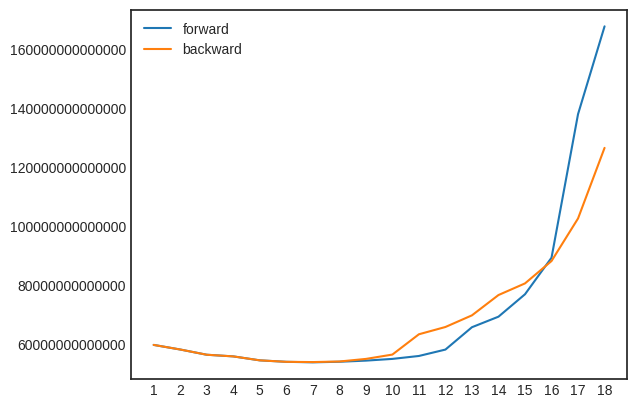

In [108]:
# instructor diagnostics 

print(model_scores_forward)
print(model_scores_backward)

feature_counts = range(1,len(model_scores_forward)+1)

greedyscoresdf = pd.DataFrame({'forward':model_scores_forward, 
                               'backward':model_scores_backward},index=feature_counts)
# greedyscoresdf.columns = ('foward','backward')
display(greedyscoresdf)
print("Best greedy feature selection models:")
print("forward:", best_idx_forward+1,"features, RMSE $",best_score_forward)
print(best_features_forward)
print("backward:",best_idx_backward+1,"features, RMSE $",best_score_backward)
print(best_features_backward)



#plot the RMSEs of the forward/backward models
plt.figure()
plt.plot(feature_counts,model_scores_forward,label='forward')
plt.plot(feature_counts,model_scores_backward,label='backward')
plt.xticks(feature_counts)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain')
plt.legend()
plt.show()

## STEP 7 (STUDENT CODE REQUIRED) Find Best Ridge Regression Model

Use RidgeCV to find the best alpha for the ridge regression of a models of  to make the prediction of the `log_y_nonTest` data using *all* the *numeric* features avaialble in the `X_nonTest_scaled` data as input for the model.  This process will involve:
    * Use K-cross-fold validation where K is defined by the instructor in the `kfold_count` and is used to populate the `cv` parameter in `RidgeCV`
    * Use the `dataspace_rmse` scorer (created above) to have the `scoring` parameter minimize the RMSE score in units of actual salary dollars
    * set `store_cv_values=True` in order to save the CV scores obtained for each `alpha` evaluated during CV
* Fit the instantiated `RidgeCV` using `.fit` with using features in `X_nonTest_scaled` and labels in `log_y_nonTest`

* Use Ridge() as set to `model` for the `estimator` in `RidgeCV`
* Capture the resulting best alpha using `.alpha_` 
* Fit a new model with this alpha to compute the RMSE score of the best `RidgeCV` model using the `dataspace_rmse` scorer

See:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html?highlight=ridgecv#sklearn.linear_model.RidgeCV


In [109]:
# STEP 7

kfold_count = 5
minLogAlpha = -3
maxLogAlpha = 7
alphaCount = 1000

alphagrid = np.zeros(alphaCount)  # placeholder for the alphas
alphagrid = np.logspace(minLogAlpha,maxLogAlpha,num=alphaCount)

best_ridge_alpha = None # placeholder
best_ridge_score = None # placeholder

#------------- START STUDENT CODE ------------------

# Create RidgeCV using alphagrid, dataspace_rmse, and store cv values
ridgeCV = RidgeCV(alphas=alphagrid, scoring=dataspace_rmse, store_cv_values=True)

# Fit RidgeCV to non-numeric features and log_y_nonTest
ridgeCV.fit(X_nonTest_scaled[numeric_features], log_y_nonTest)

# Store the best alpha found
best_ridge_alpha = ridgeCV.alpha_

# Create new Ridge model with the best alpha found
ridge_model = Ridge(best_ridge_alpha)

# Fit model using X_nonTest_scaled numeric features and log_y_nonTest
ridge_model.fit(X_nonTest_scaled[numeric_features], log_y_nonTest)

# Score using cross validation and dataspace_rmse scoreing
ridge_score = np.mean(np.abs(
         cross_val_score(ridge_model, X_nonTest_scaled[numeric_features], log_y_nonTest,
                         scoring=dataspace_rmse,
                         cv=kfold_count,
                         n_jobs=-1)))

# Store best ridge score for reference
best_ridge_score = ridge_score


#------------- END STUDENT CODE ------------------

In [110]:
#instructor diagnostics

print("Best Ridge alpha:", best_ridge_alpha, "; Best ridge RMSE $", best_ridge_score)


Best Ridge alpha: 639.4488428556937 ; Best ridge RMSE $ 60047127384648.3


## STEP 8 (STUDENT CODE REQUIRED) Find Best LASSO Regression Model

Lasso behaves differently from Ridge Regression, and if we want to use cross validation RMSE $ as a scoring function we have to accomplish crossvalidation in a different way - by using a generalized wrapper to conduct CV.   Using a generalized wrapper in this way provides some extra functionality in conducting CV over multiple hyperparameter searches and capturing the resulting best models, parameters and performance information.  It may be a wise choice for future efforts...

Use Lasso within `GridSearchCV` to find the best alpha for the Lasso regression of a models of  to make the prediction of the `log_y_nonTest` data using *all* the *numeric* features avaialble in the `X_nonTest_scaled` data as input for the model.  This process will involve:
* Wrapping a Lasso() estimator inside of a `GridSearchCV()` object
    * Setting the `estimator` of GridSearchCV to be `Lasso()`
    * Establishing a param_grid dictionary for `GridSearchCV` which contains the logspace set of `alpha` parameters (`alphagrid`)
    * Using `dataspace_rmse` as the scoring function for the `GridSearchCV`
    * Using K-cross-fold validation where K is defined by the instructor in the `kfold_count` and is used to populate the `cv` parameter in `GridSearchCV`
* Fit the instantiated `GridSearchCV` using `.fit` with the numeric features in `X_nonTest_scaled` and labels in `log_y_nonTest`
* Capture the best lasso regularization alpha using `best_params.alpha_` 
* Capture the resulting best score of that model using `best_score_` 
* Capture extended details of the CV process as a dataframe using `.cv_results_`

(Hint:  See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [111]:
# STEP 8

minLogAlpha = -3
maxLogAlpha = 7
alphaCount = 1000

alphagrid = np.zeros(alphaCount)  # placeholder for the alphas
alphagrid = np.logspace(minLogAlpha,maxLogAlpha,num=alphaCount)

lcv_model = None #placeholder for GridSearchCV() wrapper of Lasso() model
best_lasso_alpha = None  #placeholder
best_lasso_score = None  #placeholder

lasso_cv_results = pd.DataFrame() #placeholder

#------------- START STUDENT CODE ------------------

# Create Lasso model
lasso = Lasso()

# Wrap Lasso() GridSearch CV using Lasso, alphagrid, dataspace_rmse scoring, kfold_count and return training scores.
lcv_model = GridSearchCV(Lasso(),
                         {'alpha': alphagrid}, 
                         scoring=dataspace_rmse,
                         cv=kfold_count,
                         return_train_score=True)

# Fit GridSearchCV to nonTest numeric features and log_y_nontest
lcv_model.fit(X_nonTest_scaled[numeric_features], log_y_nonTest)

# Store best lasso alpha
best_lasso_alpha = lcv_model.best_params_['alpha']

# Store best lasso score - multiplied by -1 for comparision with other scores
best_lasso_score = lcv_model.best_score_*-1

# Store results in dataframe for later reference
lasso_cv_results = pd.DataFrame(lcv_model.cv_results_)

#------------- END STUDENT CODE ------------------

/home/dev1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e-02, tolerance: 1.364e-02
  model = cd_fast.enet_coordinate_descent(
/home/dev1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e-02, tolerance: 1.364e-02
  model = cd_fast.enet_coordinate_descent(
/home/dev1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

best Lasso alpha: 0.3254711605531848 ; best Lasso score: 63531782642835.15


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004149,0.001004,0.001525,0.000535,0.001,{'alpha': 0.001},-5.730794e+13,-7.256005e+13,-6.769003e+13,-8.649397e+13,...,-2.225027e+14,3.031248e+14,1000,-6.066721e+13,-5.469663e+13,-6.033847e+13,-6.187233e+13,-7.221078e+13,-6.195709e+13,5.694618e+12
1,0.003261,0.000472,0.001157,0.000026,0.001023,{'alpha': 0.0010233165783302448},-5.729495e+13,-7.259873e+13,-6.754453e+13,-8.655304e+13,...,-2.208864e+14,2.999252e+14,999,-6.066819e+13,-5.472649e+13,-6.034559e+13,-6.185908e+13,-7.228426e+13,-6.197672e+13,5.713107e+12
2,0.003135,0.000444,0.001151,0.000025,0.001047,{'alpha': 0.0010471768194855202},-5.728339e+13,-7.263878e+13,-6.739672e+13,-8.661374e+13,...,-2.192547e+14,2.966939e+14,998,-6.066830e+13,-5.475733e+13,-6.035331e+13,-6.184588e+13,-7.236009e+13,-6.199698e+13,5.732302e+12
3,0.003482,0.001063,0.001140,0.000016,0.001072,{'alpha': 0.001071593399822671},-5.727196e+13,-7.267979e+13,-6.724624e+13,-8.667665e+13,...,-2.176086e+14,2.934336e+14,997,-6.066890e+13,-5.478920e+13,-6.036166e+13,-6.183270e+13,-7.243837e+13,-6.201817e+13,5.752174e+12
4,0.003049,0.000438,0.001146,0.000024,0.001097,{'alpha': 0.0010965792912678099},-5.726046e+13,-7.272199e+13,-6.709378e+13,-8.674075e+13,...,-2.159499e+14,2.901480e+14,996,-6.067025e+13,-5.482213e+13,-6.037072e+13,-6.181967e+13,-7.251920e+13,-6.204039e+13,5.772736e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.001412,0.000010,0.001121,0.000006,9119267.598459,{'alpha': 9119267.598459298},-7.090145e+13,-1.021994e+14,-6.609008e+13,-5.923004e+13,...,-6.552943e+13,2.337291e+13,66,-6.933210e+13,-5.870961e+13,-7.112032e+13,-7.178907e+13,-7.643417e+13,-6.947706e+13,5.872072e+12
996,0.001450,0.000023,0.001135,0.000016,9331897.715733,{'alpha': 9331897.71573324},-7.090145e+13,-1.021994e+14,-6.609008e+13,-5.923004e+13,...,-6.552943e+13,2.337291e+13,66,-6.933210e+13,-5.870961e+13,-7.112032e+13,-7.178907e+13,-7.643417e+13,-6.947706e+13,5.872072e+12
997,0.001435,0.000016,0.001143,0.000016,9549485.639792,{'alpha': 9549485.639791965},-7.090145e+13,-1.021994e+14,-6.609008e+13,-5.923004e+13,...,-6.552943e+13,2.337291e+13,66,-6.933210e+13,-5.870961e+13,-7.112032e+13,-7.178907e+13,-7.643417e+13,-6.947706e+13,5.872072e+12
998,0.001438,0.000021,0.001146,0.000014,9772146.969726,{'alpha': 9772146.969725724},-7.090145e+13,-1.021994e+14,-6.609008e+13,-5.923004e+13,...,-6.552943e+13,2.337291e+13,66,-6.933210e+13,-5.870961e+13,-7.112032e+13,-7.178907e+13,-7.643417e+13,-6.947706e+13,5.872072e+12


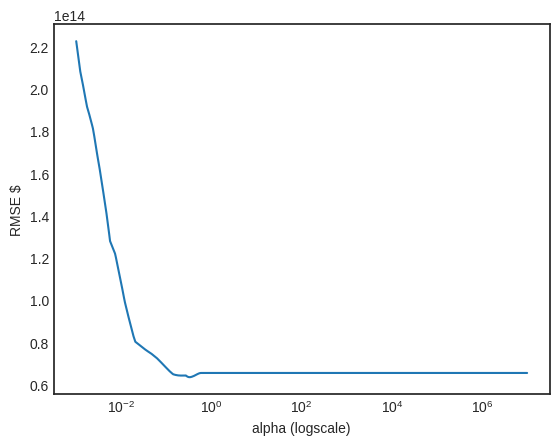

In [112]:
#instructor diagnostics

print("best Lasso alpha:",best_lasso_alpha, "; best Lasso score:",best_lasso_score)
display(lasso_cv_results)
plt.figure()
plt.semilogx(lasso_cv_results.param_alpha,-lasso_cv_results.mean_test_score)
plt.xlabel('alpha (logscale)')
plt.ylabel('RMSE $')
plt.show()



## STEP 9 (STUDENT CODE REQUIRED)  Select the best performing model of all the models and refit on *all non-test data*

1. In the code block below, re-summarize the  CV performance and hyperparameter settings of each model (via prints or displaying dataframes) 

2.  Then, for the best performing model, store the fitted model in `best_model`  
    * dont forget that if your best model is foward or backwards selection, you must subset the features when you use the test data for prediction (STEP 10)
    * refit the model to *all* the non-test (scaled) data


In [128]:
# STEP 9

#------------- START STUDENT CODE ------------------


# All models summary results
print("Best Forward score:\t", best_score_forward, "\t\t idx [",best_idx_forward,"]")
print("Best Backward score:\t", best_score_backward, "\t\t idx [",best_idx_backward,"]")
print("Best Ridge score:\t", best_ridge_score, "\t\t Best Ridge alpha:", best_ridge_alpha)
print("Best Lasso score:\t",best_lasso_score, "\t\t Best Lasso alpha:",best_lasso_alpha,"\n\n")

# Scores dict for selection of minimum
scores = {"Best Forward": best_score_forward, "Best Backward": best_score_backward,
          "RidgeCV": best_ridge_score, "Lassso":best_lasso_score}

# Print method with the lowest score and the score
print("The best mode is: (", min(scores, key=scores.get),") with a score of" ,min([best_score_forward, best_score_backward, best_ridge_score, best_lasso_score]))

# Print out predictor variables for this model
print(X_nonTest_scaled[numeric_features].iloc[:,selected_features_forward[best_idx_forward]])


# Print hyperparameters for each method 
print("\nForward selection parmaters: ")
for parameter in sfs_fwd.get_params():
    print(parameter, ": \t", sfs_fwd.get_params()[parameter])

print("\nBackward selection parmaters: ")
for parameter in sfs_bkw.get_params():
    print(parameter, ": \t", sfs_bkw.get_params()[parameter])

print("\nRidge Regression CV parmaters: ")
for parameter in ridgeCV.get_params():
    print(parameter, ": \t", ridgeCV.get_params()[parameter])
    
print("\nLASSO Grid parmaters: ")
for parameter in lcv_model.get_params():
    print(parameter, ": \t", lcv_model.get_params()[parameter])


# Best model by score is Forward Selection 
model = LinearRegression()

# Refit the best model to all the non-test scaled data
best_model = model.fit(X_nonTest_scaled[numeric_features].iloc[:,selected_features_forward[best_idx_forward]], log_y_nonTest)


#------------- END STUDENT CODE ------------------


Best Forward score:	 53914626486364.64 		 idx [ 6 ]
Best Backward score:	 54004557200441.45 		 idx [ 6 ]
Best Ridge score:	 60047127384648.3 		 Best Ridge alpha: 639.4488428556937
Best Lasso score:	 63531782642835.15 		 Best Lasso alpha: 0.3254711605531848 


The best mode is: ( Best Forward ) with a score of 53914626486364.64
        AtBat      Hits      Runs       RBI     Walks  Division_W  NewLeague_N
143 -0.522628 -0.366092 -0.122668 -0.343697 -0.409632         0.0          1.0
182  0.782855  0.863756  0.524986  0.091599  1.790776         0.0          1.0
232  1.337335  1.049393  0.605943  0.922619  0.547067         1.0          0.0
77  -1.189407 -1.340689 -0.527452 -1.135144 -1.127157         0.0          0.0
119 -0.431384 -0.273273 -0.244103 -0.383269 -1.031487         1.0          1.0
..        ...       ...       ...       ...       ...         ...          ...
20   1.590009  1.420668  0.767857  1.991072 -0.074788         0.0          0.0
188 -1.161332 -1.271075 -1.579891 -1.05

## STEP 10 (STUDENT CODE REQUIRED) Compute the RMSE performance of the best model on the test set data


In [129]:
# STEP 10

log_y_test=np.log10(y_test*1000) #transform test data actual salaries into log form of $

#------------- START STUDENT CODE ------------------

# Store the predicted values for test data
step_10_test_pred = model.predict(X_test_scaled[numeric_features].iloc[:,selected_features_forward[best_idx_forward]])
    
# Store rmse score using transofrm_rmse, log_y_test trush and predicted
test_rmse = transform_rmse(log_y_test, step_10_test_pred)*-1


#------------- END STUDENT CODE ------------------


print("Test Set Salary RMSE in dollars:",test_rmse)

Test Set Salary RMSE in dollars: 401576.9084878113


## STEP 11 (STUDENT CODE REQUIRED) Make a residuals scatterplot of the predictions 

Make 2 plots
* A plot which shows Acutal Salary in dollars on the horizontal axis and predicted salary in dollars on the vertical axis.  Include a diagonal line showing ideal predictions
* A residuals plot which shows actual salary in dollars on horizontal axis, and the residual dollars (actual dollars minus predicted dollars) on the vertical axis 

Remember that *actual* salary ranges from under $100K to ~$2.5M... your plots should reflect this range  (not the log of it)

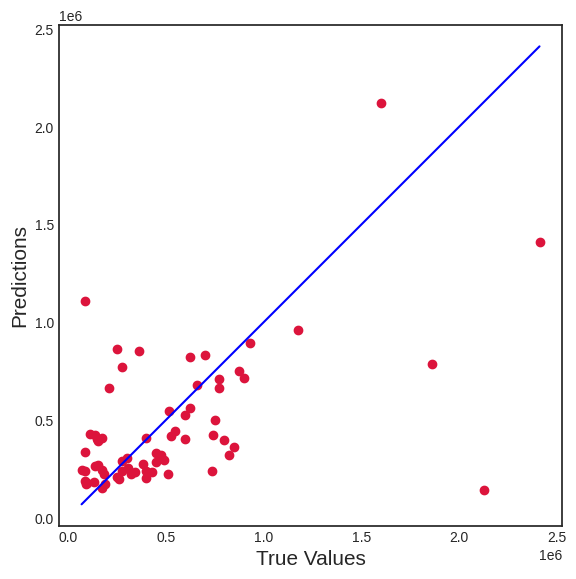

<AxesSubplot:xlabel='y_truth', ylabel='Resid - y_real-y_pred'>

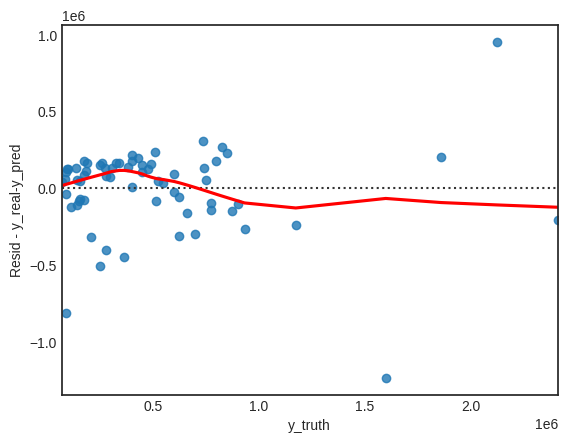

In [150]:
# STEP 11

#------------- START STUDENT CODE ------------------

# Transform y_test and predict from log of actual dollars to actual dollars
y_test_real = np.power(10, log_y_test)
y_test_pred = np.power(10,step_10_test_pred)

# Build Figure 
plt.figure(figsize=(6.5,6.5))
plt.scatter(y_test_real, y_test_pred, c='crimson')
plt.xscale('linear')
plt.yscale('linear')

# Plot a perfect predict line in blue 
p1 = max(max(y_test_pred), max(y_test_real))
p2 = min(min(y_test_pred), min(y_test_real))
plt.plot([p1, p2], [p1, p2], 'b-')

# Set x and y labels
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

# Set axis to equal so our predict line is diagonal 
plt.axis('equal')
plt.show()

# Setup dataframe for residuals
data = pd.DataFrame({'y_truth':y_test_real, 'Resid - y_real-y_pred':y_test_real-y_test_pred})

# Show residuals plot for truth vs. y_real - y_pred 
sns.residplot(x="y_truth", y="Resid - y_real-y_pred", data=data, lowess=True, line_kws=dict(color="r"))

#------------- END STUDENT CODE ------------------


## STEP 12 (STUDENT MARKDOWN REQUIRED - Impact of using this model

In the markdown cell below, 
* Describe the residuals behavior as a function of actual salary (Hint: see section 3.3.3 in ISLR "Potential Problems"
* Describe the pros and cons of the residuals with respect to things like 
    * Overpaying or underpaying salaries of prospective players with similar attributes
    * What kinds of salary ranges are likely to get overpaid (or underpaid)

Note:  Use the coding scrap area below to compute things if you wish that will support the markdown in the cell below

OPTIONAL/FUN:  Assuming this model is correct, figure out which named players are getting severly underpaid or overpaid and see if you agree with the model instead of their actual salary!


In [162]:
# Coding Scrap area for addtional analysis for STEP 12 - optional

# --------------START SCRAP -----------------------
# identify outliers
iso = IsolationForest(contamination=0.025)
yhat = iso.fit_predict(X_nonTest_scaled[numeric_features].iloc[:,selected_features_forward[best_idx_forward]])

mask = yhat != -1
#X_nonTest_scaled_masked, log_y_nonTest_masked = X_nonTest_scaled[mask, :], log_y_nonTest[mask]

print(yhat.shape)

#print(X_nonTest_scaled_masked, log_y_nonTest_masked)
#print(X_nonTest_scaled[numeric_features].iloc[:,selected_features_forward[best_idx_forward]])
print(yhat)



# --------------END SCRAP -----------------------

(197,)
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


/home/dev1/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



<font color='green'>STUDENT ANSWER HERE FOR STEP 12</font>

--------------------------

<font color='green'>...words go here....
    
<font color='green'>

--------------------------

<font color='green'>END STUDENT ANSWER </font>



# OPTIONAL:  Build a better model and provide RMSE and residuals

* Can you outperform the best model you provided above?
* Can you get better behavior in residuals?

Hint:  Maybe constraining ourselves to linear functions of the input features are limiting our performance.